### Adrian Manchado and Tanner Cellio

# Final Project AI Tools

### NOTE

Please note that after discussion with Dr. Wang, it has been appoved to turn in two seperate notebooks for our final project. This notebook is the analysis and configuration of the KNN supervised model and Kmeans unsupervised model by Adrain Manchado. Tanner Cellio will turn in the other notebook.

## Data Collection


### Dataset Description: Consumer Airfare Report - Table 1a

#### **Source**
- **Website**: [U.S. Department of Transportation’s Data Portal](https://data.transportation.gov/Aviation/Consumer-Airfare-Report-Table-1a-All-U-S-Airport-P/tfrh-tu9e/about_data)
- **Dataset Title**: *Consumer Airfare Report: Table 1a - All U.S. Airport Pair Markets with Multiple Airports in the Same City*

---

#### **Type**
- **Category**: Transportation and Aviation  
- **Format**: Structured tabular data (e.g., CSV, XLSX).
- **Provider:** U.S. Department of Transportation, Office of the Assistant Secretary for Aviation and International Affairs.
- **Update Frequency:** Quarterly (R/P3M).
- **Public Access:** Available to the public under a U.S. Government Public Domain License.
- **Last Updated:** October 22, 2024.
- **Size: 248K rows** and 31 columns.

---

#### **Relevance**
- **Application Context**:  
  This dataset provides detailed insights into airfare and passenger volumes across airport pair markets in the U.S. It is particularly useful for:
  - **Clustering Analysis**: Identifying travel patterns based on certain features of a flight.
  - **Predictive Modeling**: Estimating airfare prices.

- **Alignment with Project Goals**:  
 We will be using different models and algorithms to examine patterns within this dataset and try to predeict fare prices for all flights.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import Axes3D


In [3]:
data = pd.read_csv("/data/ai_club/SoccerStats2024/AI tools Project/dataset.csv")
data.head()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


Explanation of our data

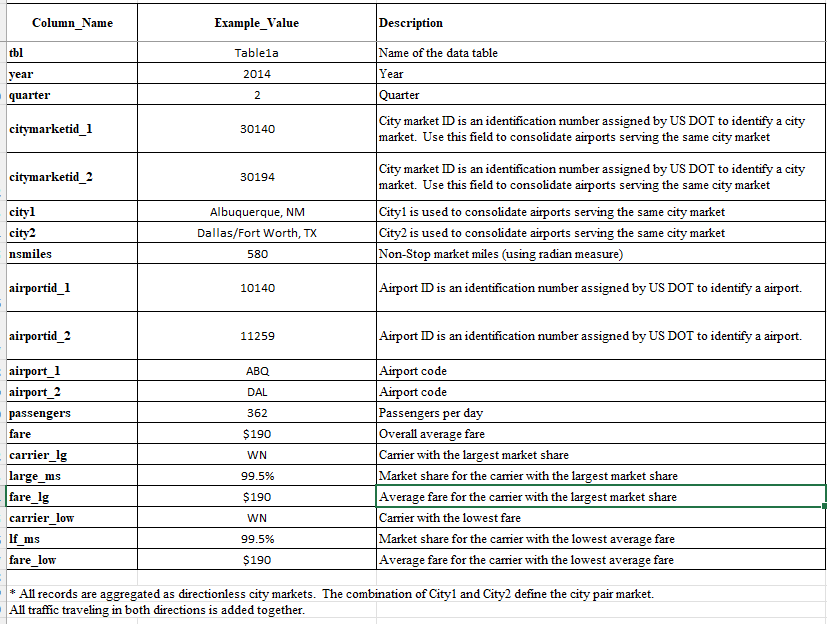

Shape of our dataset

In [4]:
data.shape

(247896, 23)

Info of our dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247896 entries, 0 to 247895
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             247896 non-null  object 
 1   Year            247896 non-null  int64  
 2   quarter         247896 non-null  int64  
 3   citymarketid_1  247896 non-null  int64  
 4   citymarketid_2  247896 non-null  int64  
 5   city1           247896 non-null  object 
 6   city2           247896 non-null  object 
 7   airportid_1     247896 non-null  int64  
 8   airportid_2     247896 non-null  int64  
 9   airport_1       247896 non-null  object 
 10  airport_2       247896 non-null  object 
 11  nsmiles         247896 non-null  int64  
 12  passengers      247896 non-null  int64  
 13  fare            247896 non-null  float64
 14  carrier_lg      246350 non-null  object 
 15  large_ms        246350 non-null  float64
 16  fare_lg         246350 non-null  float64
 17  carrier_lo

We find the missing values 

In [6]:
data.isnull().sum(axis = 0)

tbl                   0
Year                  0
quarter               0
citymarketid_1        0
citymarketid_2        0
city1                 0
city2                 0
airportid_1           0
airportid_2           0
airport_1             0
airport_2             0
nsmiles               0
passengers            0
fare                  0
carrier_lg         1546
large_ms           1546
fare_lg            1546
carrier_low        1618
lf_ms              1618
fare_low           1618
Geocoded_City1    41147
Geocoded_City2    41147
tbl1apk               0
dtype: int64

## Research Questions
1. **Is ANN going to perform better in a regression task, such as predicting the price of flights, or will a more traditional method like KNN do a better job?**
   - **Context**: This question addresses the performance of two distinct machine learning models—Artificial Neural Networks (ANN) and K-Nearest Neighbors (KNN)—in predicting flight prices. The comparison will examine the suitability of each method for a regression task.
   
   
2. **Can we find hidden patterns for classifying flights that we have not thought about before?**
   - **Context**: This question explores the potential for discovering previously unnoticed patterns or groupings in the data. The analysis will look for insights that could improve flight pricing predictions or optimize routes, based on the clustering and classification of flight data.

---

## Hypotheses
1. **Hypothesis 1**: *Artificial Neural Networks (ANNs) are likely to outperform K-Nearest Neighbors (KNN) in predicting flight prices due to their ability to capture complex, non-linear relationships in the data, whereas KNN relies on simple instance-based learning and may struggle with high-dimensional features or intricate patterns.*
   - **Explanation**: ANNs can model complex relationships through multiple layers of neurons and activation functions, making them well-suited for tasks involving non-linear patterns, like flight price prediction. KNN, in contrast, operates on the assumption that similar instances are close in feature space, which may not capture complex interactions in the data.


2. **Hypothesis 2**: *KMeans will provide us with four distinct clusters in the data, which we can use to segment the data in different ways.*
   - **Explanation**: The KMeans clustering algorithm is expected to identify natural groupings in the flight data. By segmenting the data into clusters, we might be able to uncover insights such as groups of similar flight markets or pricing trends, which can be leveraged for better predictive accura


## Data Preprocessing

### 1. **Data Cleaning**
   - **Missing Values**: Initially, we examined the dataset for missing or null values. We gruped each data point (flight) by the airport they flew from and the destination airport. Then any rows with missing values were either imputed using mean or median of that group. It is likely that a flight from the same aiport and to the same aiport has similiar price so we thought this was a good way to do this.
   - **Outliers**: We identified potential outliers using statistical methods like the median absolute deviation or IQR (Interquartile Range). Outliers were removed if they significantly skewed the data distribution and were deemed as irrelevant to the analysis.

### 2. **Data Transformation**
   - **Scaling**: The dataset contained variables with different units and ranges. To normalize the data and bring all features to a comparable scale, we applied Standard Scaling (Z-score normalization)or Normilization using minMax algorithm. It depended on the model we used. This transformation ensures each feature has the same scale which is crucial for distance-based algorithms like KNN and clustering methods like KMeans.
   - **Encoding Categorical Variables**: Any categorical features were encoded using one-hot encoding, transforming the categories into binary variables to be used in machine learning models.

### 3. **Data Preparation**
   - **Splitting Data**: We split the dataset into training, validation, and testing sets using a 70/15/15 split. This 70/15/15 split is a common and effective strategy in machine learning as it ensures that the model has a substantial amount of data for training while still leaving enough for both validation and testing.
   - **Feature Selection**: Features that were deemed irrelevant or redundant were removed to improve model efficiency and performance.

### 4. **Final Dataset for Analysis**
   - After cleaning, transforming, and preparing the data, we ensured that the final dataset was ready for analysis by ensuring no missing values and scaled/normilized features.

We drop the columns that are not meaningful, or they can be repeated by their IDs

In [7]:
cleaned_data = data.drop(['Geocoded_City1', 'Geocoded_City2','tbl', 'tbl1apk', 'city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low'], axis=1)
cleaned_data.head()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
0,2021,3,30135,33195,10135,14112,970,180,81.43,1.0000,81.43,1.0000,81.43
1,2021,3,30135,33195,10135,15304,970,19,208.93,0.4659,219.98,0.1193,154.11
2,2021,3,30140,30194,10140,11259,580,204,184.56,0.9968,184.44,0.9968,184.44
3,2021,3,30140,30194,10140,11298,580,264,182.64,0.9774,183.09,0.9774,183.09
4,2021,3,30140,30466,10140,14107,328,398,177.11,0.6061,184.49,0.3939,165.77


### Filling the missing values
The geocoded city, did not give us a lot of information different than the city or airport, so we decided to drop it. However, the lowest fare (fare_low) and the largest fare (fare_lg), are important features.

We have no data points in which the carrier_lg is null but carrier_low isnt

In [8]:
cleaned_data[(cleaned_data.fare_lg.isnull()) & (cleaned_data.fare_low.notna())]

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low


However we do have the opposite case, 72 datapoints

In [9]:
cleaned_data[(cleaned_data.fare_lg.notna()) & (cleaned_data.fare_low.isnull())]

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
6130,1996,2,31453,31650,11495,13487,1059,1,304.00,0.070,235.60,NaN,NaN
9941,1996,1,30372,31703,10372,12953,1784,112,337.30,0.080,297.74,NaN,NaN
14687,1996,3,30647,32457,10874,14831,2187,3,313.46,0.030,457.90,NaN,NaN
19199,1997,2,30325,31453,11292,11495,889,9,212.04,0.010,101.50,NaN,NaN
19281,1996,2,31703,31454,13784,13204,989,1,287.87,0.090,94.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167450,1997,1,30647,32575,10874,13891,2073,2,199.85,0.090,423.85,NaN,NaN
169196,1997,3,30721,30977,13296,13232,867,1,113.70,0.070,82.40,NaN,NaN
171581,1997,3,31603,32457,11603,14831,471,14,128.15,0.008,202.20,NaN,NaN
172039,1994,1,30647,32457,10874,14831,2187,3,341.88,0.080,306.40,NaN,NaN


We thought a great way to fill the missing values is to group them by the airport where they flew from and the one they flew to. It is likely that flights from the same airport to the same destination airport likely have similiar prices and this would be a good way to fill in null values.

In [10]:
grouped = cleaned_data.groupby(['airportid_1', 'airportid_2'])
grouped_df = grouped.apply(lambda x: x.head())  # Show the first few rows of each group
grouped_df

Year  quarter  citymarketid_1  citymarketid_2  \
airportid_1 airportid_2                                                         
10135       10986       137600  1994        1           30135           30977   
                        145715  1993        2           30135           30977   
                        147414  1993        3           30135           30977   
                        167825  1993        1           30135           30977   
                        175541  1993        4           30135           30977   
...                              ...      ...             ...             ...   
16440       15715       41421   1993        1           30423           30852   
                        113981  1993        4           30423           30852   
                        122131  1993        3           30423           30852   
                        132570  1993        2           30423           30852   
                        163922  1994        1           30423           30852   

                                airportid_1  airportid_2  nsmiles  passengers  \
airportid_1 airportid_2                                                         
10135       10986       137600        10135        10986      654           1   
                        145715        10135        10986      654           1   
                        147414        10135        10986      654           1   
                        167825        10135        10986      654           1   
                        175541        10135        10986      654           0   
...                                     ...          ...      ...         ...   
16440       15715       41421         16440        15715     1340           9   
                        113981        16440        15715     1340          11   
                        122131        16440        15715     1340          11   
                        132570        16440        15715     1340          17   
                        163922        16440        15715     1340          11   

                                  fare  large_ms  fare_lg  lf_ms  fare_low  
airportid_1 airportid_2                                                     
10135       10986       137600  283.57      0.80   285.85   0.20    274.45  
                        145715  285.76      0.84   251.36   0.84    251.36  
                        147414  333.96      0.66   324.72   0.66    324.72  
                        167825  237.11      0.58   246.40   0.25    117.60  
                        175541  343.72      1.00   343.72   1.00    343.72  
...                                ...       ...      ...    ...       ...  
16440       15715       41421   305.43      0.71   312.16   0.23    260.93  
                        113981  235.74      0.64   214.28   0.64    214.28  
                        122131  235.51      0.53   234.24   0.40    231.15  
                        132570  253.81      0.56   290.01   0.38    180.62  
                        163922  267.55      0.70   232.59   0.70    232.59  

[17951 rows x 13 columns]

However we thought there could have been some outliers making the mean or mode fulfilling pretty inconvenient. So we found the standard deviation of them and plotted them

In [11]:
fare_std = grouped['fare'].std()
fare_std

airportid_1  airportid_2
10135        10986          43.133977
             13204          12.748917
             13232          34.119243
             13930          19.730241
             14112          13.031269
                              ...    
16440        14771          20.666198
             14831          31.646274
             14908          14.689470
             15070          38.223749
             15715          47.115248
Name: fare, Length: 4103, dtype: float64

If we plot the highest fares std we can observe this

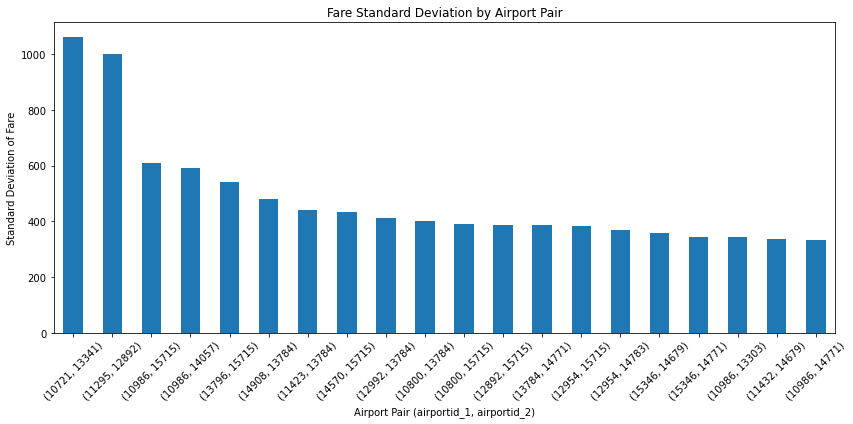

In [12]:
# Plot the fare standard deviation
fare_std.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Fare Standard Deviation by Airport Pair')
plt.xlabel('Airport Pair (airportid_1, airportid_2)')
plt.ylabel('Standard Deviation of Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We took the group with the highest std and we found and outlier that was making the std really large

In [13]:
grouped.get_group((10721, 13341))

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
39772,2001,2,30721,33198,10721,13341,1256,0,99.20,0.33,70.6,0.33,70.6
91821,1997,1,30721,33198,10721,13341,1256,0,1950.00,NaN,NaN,NaN,NaN
126543,2001,1,30721,33198,10721,13341,1256,0,124.56,0.33,93.8,0.33,93.8


We defined a function to remove outliers, based on the distance to the median value

In [14]:
def filter_outliers(group):
    median_fare = group['fare'].median()
    
    # Calculate the median absolute deviation (MAD)
    mad = (group['fare'] - median_fare).abs().median()
    
    # Define a threshold for how far a value can be from the median
    threshold = 4 * mad  # You can adjust the multiplier as needed
    # Filter the group to only keep values within the threshold distance from the median
    return group[(group['fare'].abs() - median_fare) <= threshold]

# Apply the function to each group
filtered_groups = grouped.apply(filter_outliers)

Our new shape

In [15]:
filtered_groups.shape

(243256, 13)

We can plot our std of our groups again

In [16]:
df_no_outliers = filtered_groups.reset_index(drop=True)

grouped_no_outliers = df_no_outliers.groupby(['airportid_1', 'airportid_2'])

# Calculate the standard deviation of 'fare' for each group
fare_sd = grouped_no_outliers['fare'].std()

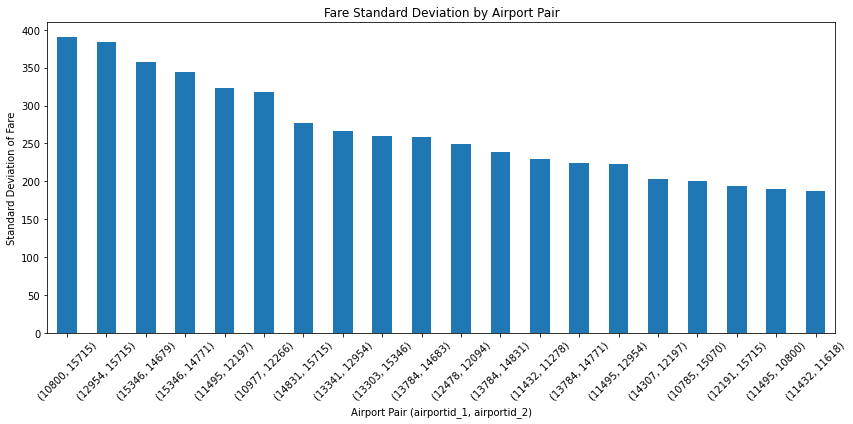

In [17]:
fare_sd.sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12, 6))
plt.title('Fare Standard Deviation by Airport Pair')
plt.xlabel('Airport Pair (airportid_1, airportid_2)')
plt.ylabel('Standard Deviation of Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is the std of our fare now

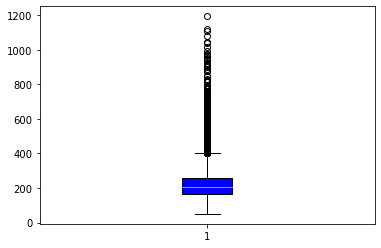

In [18]:
plt.boxplot(filtered_groups["fare"], vert=True, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.show()

Now we can fulfill the null values of our columns missing data

In [19]:
df_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']] = grouped_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']].transform(lambda x: x.fillna(x.median()))


We check for null values and we see that there are still 106 left. These are probably because they were the only ones in between their groups

In [20]:
df_no_outliers.isnull().sum(axis = 0)


Year                0
quarter             0
citymarketid_1      0
citymarketid_2      0
airportid_1         0
airportid_2         0
nsmiles             0
passengers          0
fare                0
large_ms          106
fare_lg           106
lf_ms             106
fare_low          106
dtype: int64

In [21]:
df_no_outliers[df_no_outliers.fare_lg.isnull()].head(5)

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
4108,1994,1,30257,31714,10257,11714,1204,0,424.90,NaN,NaN,NaN,NaN
4884,1994,1,30257,31454,10257,13936,1073,1,140.51,NaN,NaN,NaN,NaN
6357,1998,2,30397,30977,10397,10977,606,0,255.95,NaN,NaN,NaN,NaN
13601,2013,1,30466,33214,10466,14683,843,0,364.30,NaN,NaN,NaN,NaN
15139,1996,4,30529,33195,10529,14112,1120,0,257.40,NaN,NaN,NaN,NaN


A decent way to fulfill them is to use the closest points to them in fare, by backward and forward filling of null values

In [22]:
df_no_outliers = df_no_outliers.sort_values(by='fare')

# Forward fill the remaining null values in 'fare'
df_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']] = df_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']].fillna(method='ffill')

# Backward fill the remaining null values in 'fare'
df_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']] = df_no_outliers[['large_ms', 'fare_lg', 'lf_ms', 'fare_low']].fillna(method='bfill')

Now we have got rid of all the null values

In [23]:
df_no_outliers.isnull().sum(axis = 0)


Year              0
quarter           0
citymarketid_1    0
citymarketid_2    0
airportid_1       0
airportid_2       0
nsmiles           0
passengers        0
fare              0
large_ms          0
fare_lg           0
lf_ms             0
fare_low          0
dtype: int64

Now that the grouping, and filtering has been done, we can drop the city marketID and the airport. Which actually represent categorical features behind numbers such as the IDs. Categorical and numerical features are hard to combine, plus we already have the distance 

In [24]:
df_no_outliers = df_no_outliers.drop(['citymarketid_1','citymarketid_2','airportid_1','airportid_2'], axis=1)

Now we can plot the distribution of our columns of data

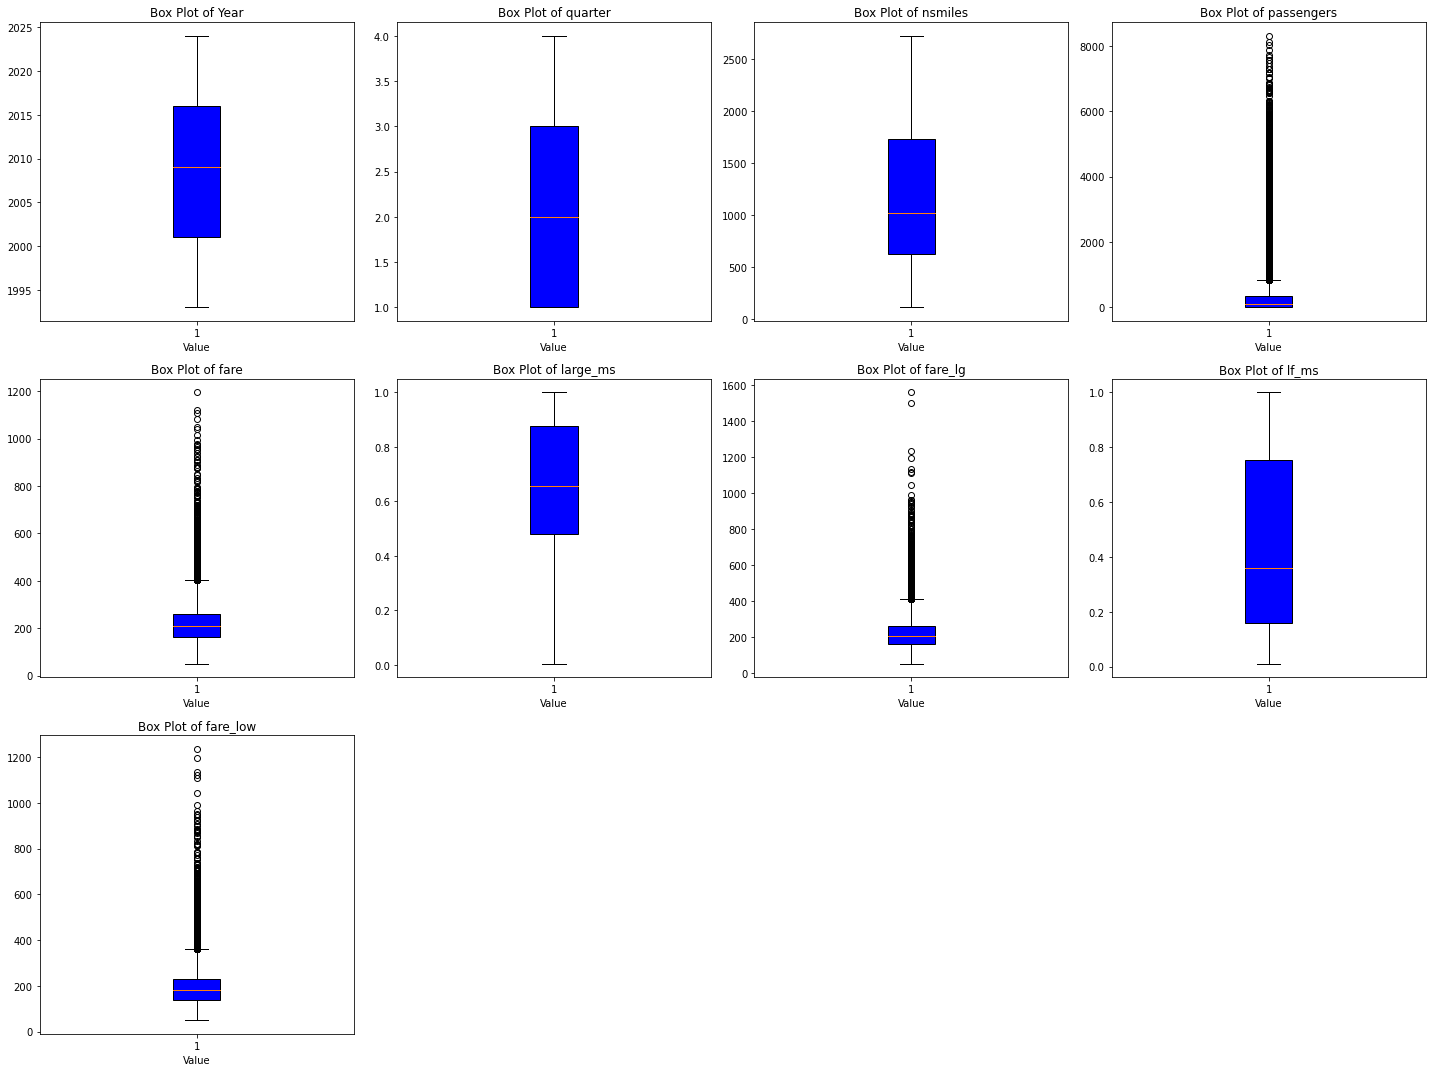

In [25]:
numeric_data = df_no_outliers.select_dtypes(include=['number'])

# Number of columns in the numeric data
num_columns = len(numeric_data.columns)

# Calculate the number of rows needed (4 per row)
num_rows = int(np.ceil(num_columns / 4))  # Round up to ensure all plots fit

# Create a figure with subplots arranged with 4 columns per row
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))  # Adjust the figsize accordingly

# Flatten the axes array for easier iteration if num_rows > 1
axes = axes.flatten()

# Loop through each column to create box plots
for i, column_name in enumerate(numeric_data.columns):
    axes[i].boxplot(numeric_data[column_name], vert=True, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
    axes[i].set_title(f'Box Plot of {column_name}')
    axes[i].set_xlabel('Value')

# If there are any empty subplots, hide them
for i in range(num_columns, len(axes)):
    axes[i].axis('off')

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()

The quarter of the year is representing an actual categorical feauture, so we can convert it into dummy values, to make it numerical

In [26]:
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['quarter'], prefix='Quarter')

There is no clear relationship between year and the fare prices, so we are going to convert it into categorical too

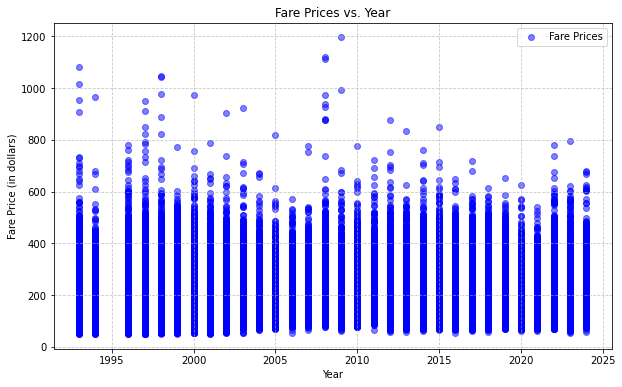

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['Year'], df_no_outliers['fare'], alpha=0.5, c='blue', label='Fare Prices')
plt.title('Fare Prices vs. Year')
plt.xlabel('Year')
plt.ylabel('Fare Price (in dollars)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

We divided it into different bins, which would determine what type of category each year is

In [28]:
bins = [1990, 2000, 2010, 2020, 2030]  # Specify ranges
labels = ['1990s', '2000s', '2010s', '2020s']  # Labels for each bin

# Create a new categorical column
df_no_outliers['Year_Category'] = pd.cut(df_no_outliers['Year'], bins=bins, labels=labels)
df_no_outliers.drop(columns=['Year'], inplace = True)

Now we perform one hot encoding in the new categories

In [29]:
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['Year_Category'], prefix='Year_Category')

Our dataset before normalization

In [30]:
df_no_outliers.head(5)

,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Year_Category_1990s,Year_Category_2000s,Year_Category_2010s,Year_Category_2020s
63380,1217,0,50.00,1.0,50.00,1.0,50.00,0,1,0,0,1,0,0,0
43996,591,0,50.40,1.0,50.40,1.0,50.40,1,0,0,0,1,0,0,0
69423,550,4,50.41,1.0,50.41,1.0,50.41,0,1,0,0,1,0,0,0
43897,248,0,50.50,1.0,50.50,1.0,50.50,0,0,0,1,1,0,0,0
65517,1246,6,50.72,1.0,50.72,1.0,50.72,1,0,0,0,1,0,0,0


Now is time to normalize our values in scale. For that we are using z-score normalization

In [30]:
scaler = StandardScaler()
columns_to_scale = ['nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']

scaled_columns = scaler.fit_transform(df_no_outliers[columns_to_scale])

df_scaled = df_no_outliers.copy()  
df_scaled[columns_to_scale] = scaled_columns

Scaled dataset ready for use


In [31]:
df_scaled.head(5)

,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Year_Category_1990s,Year_Category_2000s,Year_Category_2010s,Year_Category_2020s
63380,0.040429,-0.589577,50.00,1.487632,-2.101539,1.646442,-2.027862,0,1,0,0,1,0,0,0
43996,-0.851307,-0.589577,50.40,1.487632,-2.096474,1.646442,-2.022001,1,0,0,0,1,0,0,0
69423,-0.909712,-0.581811,50.41,1.487632,-2.096348,1.646442,-2.021854,0,1,0,0,1,0,0,0
43897,-1.339910,-0.589577,50.50,1.487632,-2.095208,1.646442,-2.020535,0,0,0,1,1,0,0,0
65517,0.081740,-0.577928,50.72,1.487632,-2.092423,1.646442,-2.017312,1,0,0,0,1,0,0,0


## Machine Learning Experimental Design

### 1. **Models to be Used**
NOTE: ANN model experiemental design is in Tanner's notebook.
     
   - **K-Nearest Neighbors (KNN)**:
     - **Reasoning**: KNN is a simple, yet powerful method for regression tasks, especially when dealing with high-dimensional feature spaces. We chose KNN to compare its performance against ANN in predicting flight prices.
     - **Distance Metric**: We will experiment with different distance metrics, including Euclidean, Manhattan, and Minkowski, 

   - **K-Means Clustering**:
     - **Reasoning**: K-Means will be used to segment the flight dataset into clusters, based on features like distance, ticket price, and other attributes. This clustering could reveal hidden patterns or insights into flight pricing and allow us to apply different models for different clusters.

### 2. **Hyperparameter Tuning**

   - **KNN Hyperparameters**:
     - **Number of Neighbors (k)**: We will test different values of `k` to determine the optimal number of neighbors for regression.
     - **Distance Metric**: We will experiment with different distance metrics (e.g., Euclidean and Manhattan) to determine which provides the best results for flight price prediction.
     - **Weighting Function**: We will explore different weighting schemes (uniform vs. distance-based) to see how the weighting of neighbors affects the prediction.

   - **K-Means Hyperparameters**:
     - **Number of Clusters (k)**: We will try different values for `k`  using the **Elbow Method** and **Silhouette Score** to determine the optimal number of clusters.
     - **Initialization Method**: We will experiment with different initialization methods (e.g., random, k-means++) to improve the clustering results.
     - **Random state**: We will experiment with different degrees of initial randomness


### 3. **Evaluation Methods**
   - **Mean Absolute Error (MAE)**: We will calculate the Mean Absolute Error for KNN andto measure the average magnitude of errors in predictions, without considering their direction (positive or negative).
   - **Mean Squared Error (MSE)**: We will also compute the Mean Squared Error, which emphasizes larger errors, as it penalizes them more heavily than MAE.
   - **R-squared (R²)**: We will use R-squared to measure how well the models fit the data and explain the variance in flight prices.
   - **Silhouette Score**: For the K-Means clustering model, we will compute the Silhouette Score to evaluate how well-defined the clusters are, and whether the data points are well-matched to their assigned clusters.
   - **WSS and BSS**: For K-means clustering: we will calculate the Within-Cluster Sum of Squares and Between-Cluster Sum of Squares in order to find the most optimal K
   - **Visualization**: We will visualize the results of clustering using a 3D scatter plot and the final prediction errors using plots to better understand the models' performance.



## Supervised Learning

### KNN Model

Now we need to separate our data in training, validation and testing data, in order to train our model

# Split Data
We decided to split our data to be 70% training, 15% validation, and 15% testing. This 70/15/15 split is a common and effective strategy in machine learning as it ensures that the model has a substantial amount of data for training while still leaving enough for both validation and testing.

In [36]:
X = df_scaled.drop(columns = ['fare'])
y = df_scaled['fare']

# Split into train and temporary set (70% train, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (50% each of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 170279
Validation set size: 36488
Test set size: 36489


Now we train our model with our training data

In [37]:
knn = KNeighborsRegressor(n_neighbors=7)  # You can tune n_neighbors

# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

After the train we have to measure our model in training and testing. We created a function to evaluate the performance

In [38]:
def measuring_performance(predicted_values, actual_values, type_set):
    mse = mean_squared_error(actual_values, predicted_values)
    mae = mean_absolute_error(actual_values, predicted_values)
    r2 = r2_score(actual_values, predicted_values)

    
    return mse, mae, r2

Performance in the training set with default values of knn

In [39]:
y_pred_train = knn.predict(X_train)
mse_train, mae_train, r2_train = measuring_performance(y_pred_train, y_train, "Train")
print(f"Train Mean Squared Error: {mse_train}")
print(f"Train Mean Absolute Error: {mae_train}")
print(f"Train R-squared: {r2_train}")

Train Mean Squared Error: 237.55315314979464
Train Mean Absolute Error: 8.11732285585086
Train R-squared: 0.9571004268647305


Performance in validation set with default values

In [40]:
y_pred_valid = knn.predict(X_val)
mse_val, mae_val, r2_val = measuring_performance(y_pred_valid, y_val, "Validation")
print(f"Validation Mean Squared Error: {mse_val}")
print(f"Validation Mean Absolute Error: {mae_val}")
print(f"Validation R-squared: {r2_val}")

Validation Mean Squared Error: 288.9212722839267
Validation Mean Absolute Error: 9.319263436902935
Validation R-squared: 0.9479947340940381


We define a function to run the KNN algorithm with different parameters

In [41]:
def run_knn(X, y, k=5, metric = 'euclidean', weights = 'uniform', data_type = 'Training'):
    if (metric == 'minkowski'):
        knn = KNeighborsRegressor(n_neighbors=k, metric = metric, weights=weights, p =3)
    else :
        knn = KNeighborsRegressor(n_neighbors=k, metric = metric, weights=weights)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X)
    mse_train, mae_train, r2_train = measuring_performance(y_pred, y, data_type)
    return mse_train, mae_train, r2_train

Function to run experiments with different metrics

In [42]:
def run_experiments(k_values = range(1,20, 4), metric = 'euclidean', weights = 'uniform'):
    datasets = ['Train', 'Validation']
    # Lists to store performance metrics
    train_abs_errors = []
    val_abs_errors = []
    train_sqr_errors =[]
    val_sqr_errors = []
    train_r2_list = []
    val_r2_list = []

     
    for k in k_values:
        mse_train, mae_train, r2_train = run_knn(X_train, y_train, k=k, metric = metric, weights = weights, data_type = 'Train')

        train_abs_errors.append(mae_train)
        train_sqr_errors.append(mse_train)
        train_r2_list.append(r2_train)
        
    for k in k_values:
        mse_val, mae_val, r2_val = run_knn(X_val, y_val, k=k, metric = metric, weights = weights, data_type = 'Validation')
        val_abs_errors.append(mae_val)
        val_sqr_errors.append(mse_val)
        val_r2_list.append(r2_val)
        
    print(f"Train absolute error: {train_abs_errors}")
    print(f"Train Mean Squared error: {train_sqr_errors}")
    print(f"Train R^2: {train_r2_list}")
          
    print(f"Validation absolute error: {val_abs_errors}")
    print(f"Validation Mean Squared error: {val_sqr_errors}")
    print(f"Validation R^2: {val_r2_list}")

    plot_experiment(k_values, train_sqr_errors, val_sqr_errors, train_abs_errors, val_abs_errors, train_r2_list, val_r2_list)
    


Function for plotting the experiments

In [43]:
def plot_experiment(k_values, train_mse, val_mse, train_mae, val_mae, train_r2, val_r2):
    # Plot the errors and R-squared values for each k
    plt.figure(figsize=(18, 6))

    # Subplot for Mean Squared Error (MSE)
    plt.subplot(1, 3, 1)
    plt.plot(k_values, train_mse, label='Train MSE', marker='o')
    plt.plot(k_values, val_mse, label='Validation MSE', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs k')
    plt.legend()

    # Subplot for Mean Absolute Error (MAE)
    plt.subplot(1, 3, 2)
    plt.plot(k_values, train_mae, label='Train MAE', marker='o')
    plt.plot(k_values, val_mae, label='Validation MAE', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Mean Absolute Error')
    plt.title('MAE vs k')
    plt.legend()

    # Subplot for R-squared
    plt.subplot(1, 3, 3)
    plt.plot(k_values, train_r2, label='Train R²', marker='o')
    plt.plot(k_values, val_r2, label='Validation R²', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('R²')
    plt.title('R² vs k')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

**Experimenting with the k values**

We can see that with lower values of k the model is overfitting, since there is a big difference between training and validation errors. We can observe that the training error increases, as the validation error decreases until a point they converge in the MSE. In the case of mean absolute error, we observe the same beahvior, but at some point both the training and validation errors slightly increase paralelally

Train absolute error: [0.06407231660979923, 7.129338634437209, 7.8002471120925065, 8.11732285585086, 8.31539723369033, 8.47209754152143, 8.597014447330105, 8.700659736863226, 8.79630421422558, 8.884774665479348, 8.974104890601112, 9.051062861794337]
Train Mean Squared error: [14.333613859019609, 178.81310973937548, 216.9003828635827, 237.55315314979464, 250.04245790269835, 259.58083471355394, 266.293739671832, 272.09731800917837, 276.9399424770981, 281.5482278534371, 286.07076570979365, 289.76126995947527]
Train R^2: [0.9974115017717741, 0.9677082540176927, 0.9608300975409205, 0.9571004268647305, 0.9548449912472626, 0.9531224618336832, 0.9519101825884307, 0.9508621180604375, 0.9499875915817375, 0.9491553842508342, 0.9483386620101345, 0.9476721961903126]
Validation absolute error: [12.158449901337427, 9.938076079807061, 9.460089563692174, 9.319263436902935, 9.28172010889425, 9.25652319068785, 9.269995256607018, 9.289462453409339, 9.31053474470253, 9.354736293979851, 9.391181392969377, 9

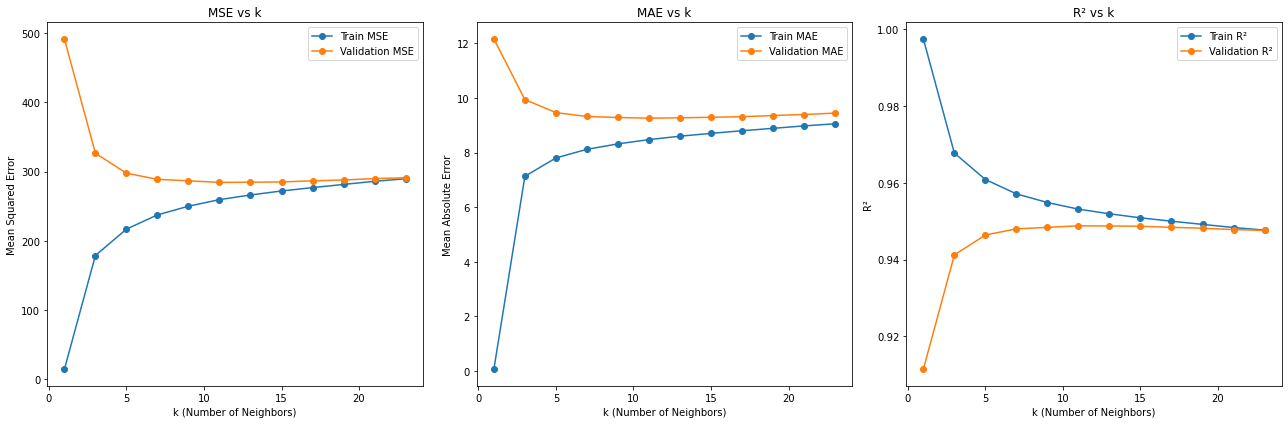

In [44]:
run_experiments(k_values = range(1,25,2), metric = 'euclidean', weights = 'uniform')

We experimented with higher values of K, just to determine at which point the model errors cross, and both of them keep increasing

Train absolute error: [9.120190921957493, 9.255550450568855, 9.378370625961992, 9.493943088314678, 9.601362763464666, 9.70568060131379, 9.800373945712865, 9.89028805887607, 9.97340536269526, 10.056467990479272, 10.134361527935829, 10.212098137149336]
Train Mean Squared error: [292.82118552830303, 299.2880451942649, 304.6854097870291, 309.646188013337, 313.85106751164153, 318.13464047479255, 322.0658524581581, 325.8779024923152, 329.6302593696932, 333.1478196472863, 336.3623572482253, 339.6298192539774]
Train R^2: [0.9471196079800862, 0.9459517618979906, 0.9449770552522784, 0.9440811914613517, 0.943321834941892, 0.9425482672195681, 0.9418383321429148, 0.9411499164470283, 0.9404722807004331, 0.9398370467227508, 0.9392565354178951, 0.9386664665283693]
Validation absolute error: [9.482984378425787, 9.569409045203336, 9.666571068612013, 9.755459640192703, 9.844474066983599, 9.920048082779118, 10.006918824863863, 10.078732253147066, 10.146826103847648, 10.225587222028532, 10.295526862361493,

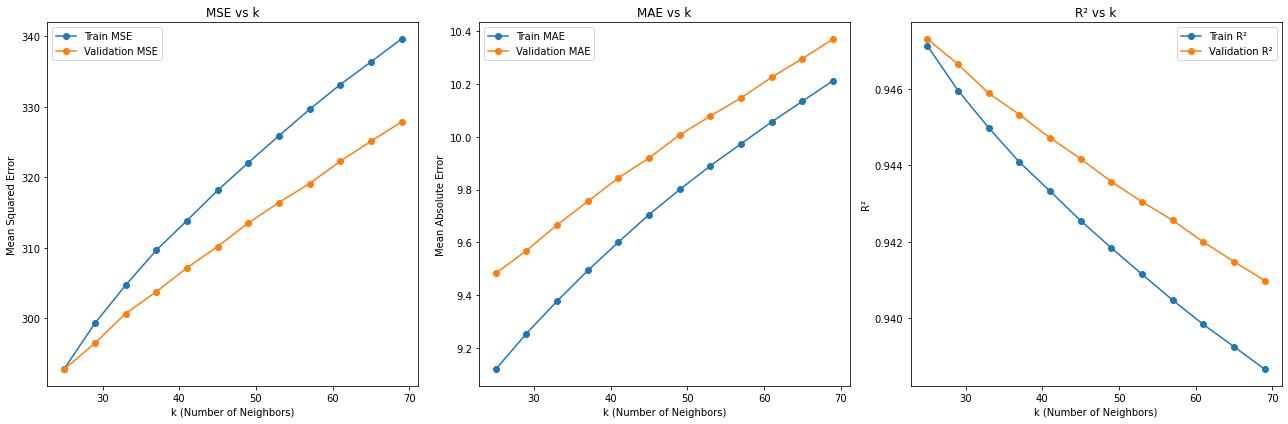

In [112]:
run_experiments(k_values = range(25,70,4), metric = 'euclidean', weights = 'uniform')

**Experimenting with the weights of voting**

We can observe when we implement weighted voting based on the distance, the model overfits consistently. It is doing excellent in the training set, with an error close to 0. However that does not generalise to the validation set, since it is remaining around the same values, around mae of 8, as in uniform voting

Train absolute error: [0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078, 0.05928520447814078]
Train Mean Squared error: [6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676, 6.768313798021676]
Train R^2: [0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503, 0.9987777145075503]
Validation absolute error: [9.297207945139576, 9.140374014265312, 9.080552614733762, 9.043551110175715, 9.051066889508396, 9.060665348744248, 9.078567606277863, 9.113180861685779, 9.142573150442495, 9.18108024176005]
Validation Mean Squared error: [310.90344011208106, 301.7541696346195, 298.4717264577713, 295.53154585867134, 295.3296044

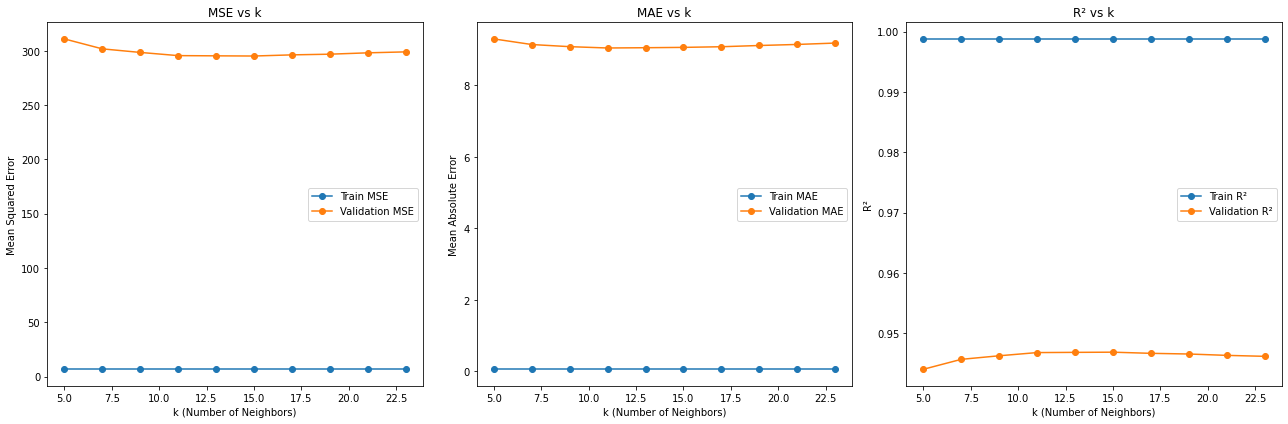

In [114]:
run_experiments(k_values = range(5,25,2), metric = 'euclidean', weights = 'distance')

We tried using higher values of K to reduce the overfitting, however it did not succeed, we still found a big difference between training and validation errors

Train absolute error: [0.05928520447814078, 0.05928520447814078, 0.05928520447814078]
Train Mean Squared error: [6.768313798021676, 6.768313798021676, 6.768313798021676]
Train R^2: [0.9987777145075503, 0.9987777145075503, 0.9987777145075503]
Validation absolute error: [10.071850091267903, 10.101701608771336, 10.128441696878207]
Validation Mean Squared error: [332.06114459216127, 333.1648362083411, 334.0887021822965]
Validation R^2: [0.9402296411578065, 0.9400309788179798, 0.9398646847432749]


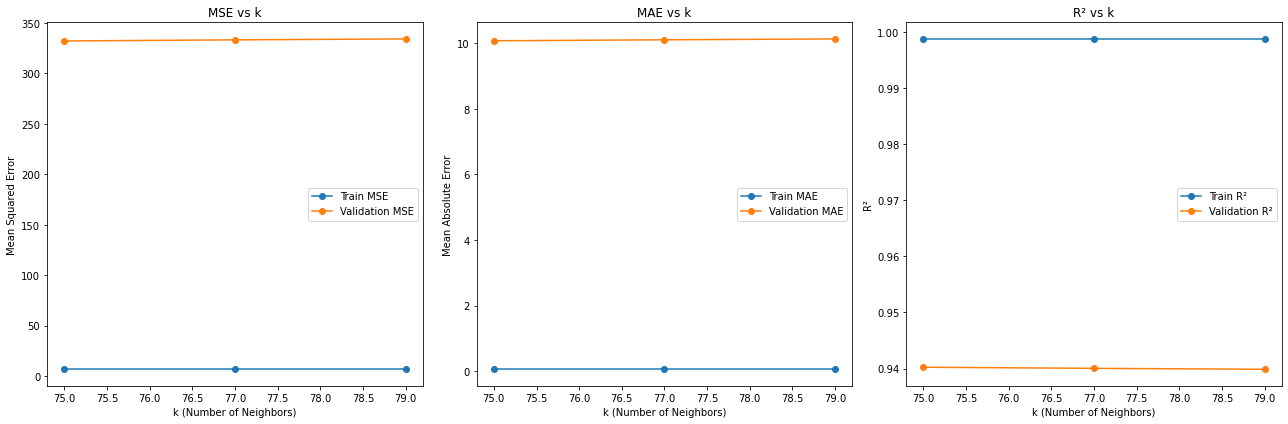

In [115]:
run_experiments(k_values = range(75,80,2), metric = 'euclidean', weights = 'distance')

**Experimenting with distance metrics**

From earlier we found out that the range between 13 and 25 was the best number of neighbours, since it avoid overfitting and it was still doing a good job in the training set. For the weighting, we saw above that the uniform weighting was the best option. now we are going to find the most optimal distance metric. We will start by the default euclidean

Train absolute error: [8.597014447330105, 8.700659736863226, 8.79630421422558, 8.884774665479348, 8.974104890601112, 9.051062861794337, 9.120190921957493]
Train Mean Squared error: [266.293739671832, 272.09731800917837, 276.9399424770981, 281.5482278534371, 286.07076570979365, 289.76126995947527, 292.82118552830303]
Train R^2: [0.9519101825884307, 0.9508621180604375, 0.9499875915817375, 0.9491553842508342, 0.9483386620101345, 0.9476721961903126, 0.9471196079800862]
Validation absolute error: [9.269995256607018, 9.289462453409339, 9.31053474470253, 9.354736293979851, 9.391181392969377, 9.44189573939735, 9.482984378425787]
Validation Mean Squared error: [284.7664707127998, 285.1682267362055, 286.74070538881244, 288.006341186113, 289.9686229068942, 291.2113113800523, 292.7729520613593]
Validation R^2: [0.9487425902791674, 0.9486702749779735, 0.948387231885252, 0.9481594199084515, 0.9478062130231816, 0.9475825315200026, 0.947301439240992]


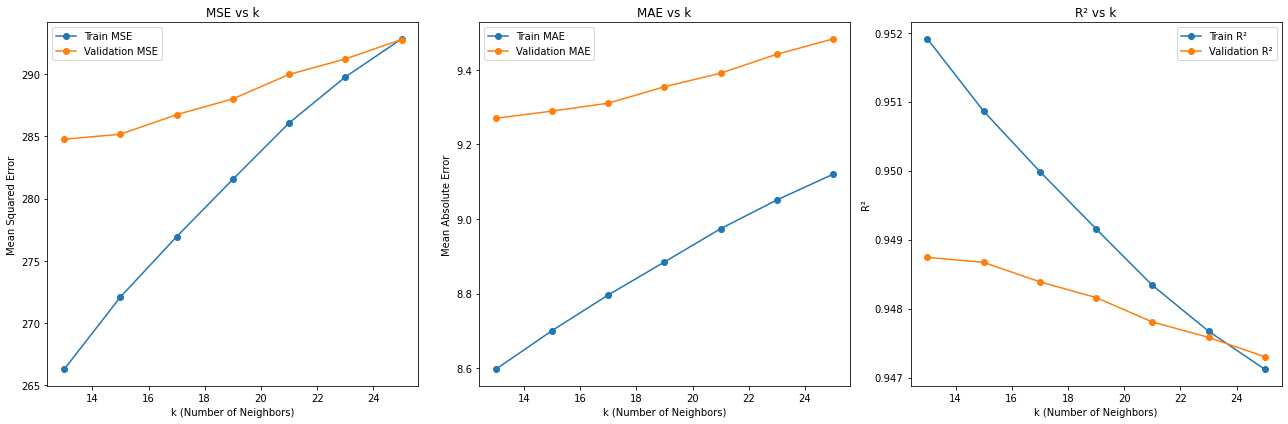

In [117]:
run_experiments(k_values = range(13,27,2), metric = 'euclidean', weights = 'uniform')

Manhattan performed slightly better than euclidean distance when comparing the MAE for both

Train absolute error: [8.54899232797576, 8.649444480333255, 8.739677456686138, 8.821359026563528, 8.899011004069234, 8.96828462597318, 9.038618300553795]
Train Mean Squared error: [267.2696500699947, 273.46575747284027, 278.4638518482398, 283.2308434440957, 287.69543543515533, 291.4562267725799, 295.0762206160553]
Train R^2: [0.951733943549107, 0.9506149924463416, 0.9497123897557378, 0.9488515217693941, 0.948045263935726, 0.9473661050153449, 0.9467123726250218]
Validation absolute error: [9.192751231174, 9.212306365563109, 9.23282745656912, 9.265221659031376, 9.298975814618766, 9.339307205227685, 9.380320609515458]
Validation Mean Squared error: [286.58728050926044, 286.82978765809156, 287.5727559555059, 289.7330306797408, 291.13083892347925, 293.05950661886305, 294.35689636106116]
Validation R^2: [0.9484148480645476, 0.9483711972504024, 0.9482374644049067, 0.9478486191649019, 0.9475970164053455, 0.9472498599791337, 0.9470163323541398]


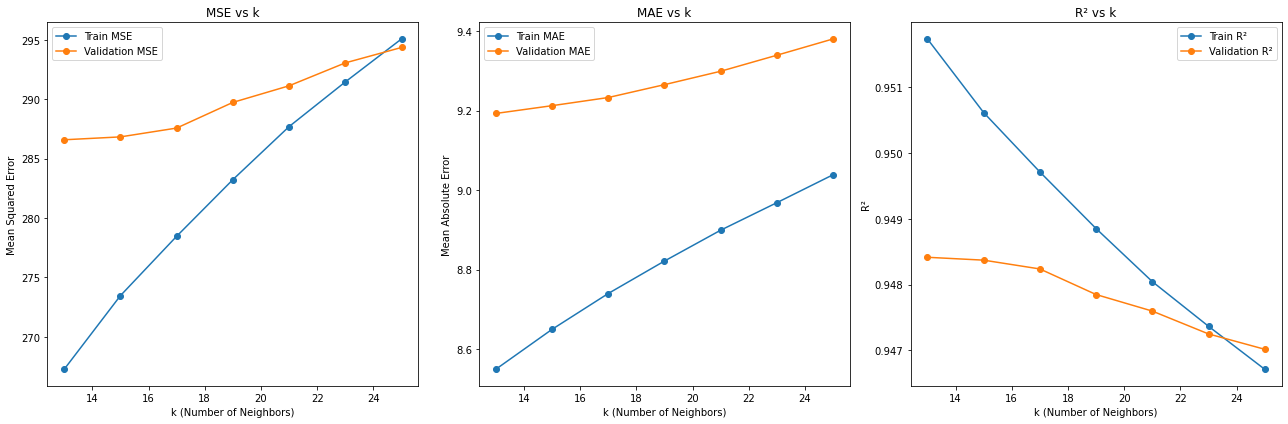

In [118]:
run_experiments(k_values = range(13,27,2), metric = 'manhattan', weights = 'uniform')

Chebysev gives generally higher errors than both manhattan and euclidean distances. As well the R^2 is 0.005 lower

Train absolute error: [9.03149480468028, 9.163413084800045, 9.281885379807463, 9.387331274586197, 9.486805657046318, 9.578389494785666, 9.66527854638564]
Train Mean Squared error: [278.2980345406083, 284.90153866575577, 290.4773434948741, 295.08494878754544, 299.7350291948353, 303.78976457241737, 307.4199868666308]
Train R^2: [0.9497423345980668, 0.9485498119798248, 0.9475428809250983, 0.9467107964100728, 0.9458710413410605, 0.9451387992530548, 0.9444832197133056]
Validation absolute error: [9.767184047863996, 9.808738233574507, 9.843954579749024, 9.886373025306085, 9.945411159311346, 9.997143968713955, 10.054144442008333]
Validation Mean Squared error: [301.2154548083086, 301.9691434289873, 302.8373050829528, 304.084350908962, 305.8052592107752, 307.26185268604763, 309.22978453911867]
Validation R^2: [0.9457818052009084, 0.945646142718119, 0.945489875312445, 0.9452654094942453, 0.9449556493539548, 0.9446934653672943, 0.9443392414692242]


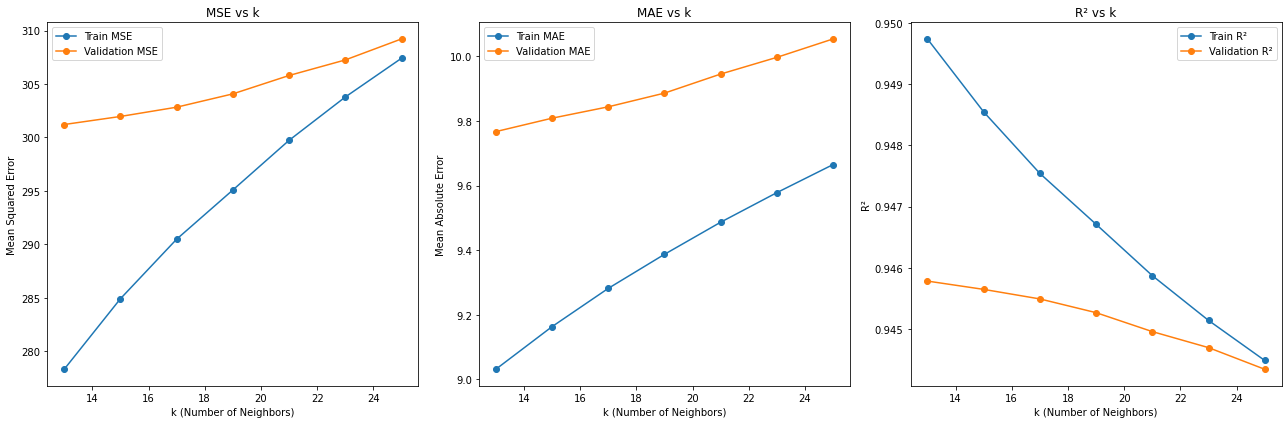

In [119]:
run_experiments(k_values = range(13,27,2), metric = 'chebyshev', weights = 'uniform')

Minkowski is performing worse than manhattan and euclidean.

Train absolute error: [8.699803467341154, 8.80922617977946, 8.910742069330508, 9.012716340767057, 9.094771958290302, 9.175724970042774, 9.25181604073315]
Train Mean Squared error: [268.75030229883066, 274.4192732944063, 279.4337588536002, 284.69729303033046, 288.71891759886296, 292.4003191335389, 296.03348236368123]
Train R^2: [0.9514665535029778, 0.95044279762939, 0.9495372348653094, 0.9485866965694769, 0.9478604339414597, 0.9471956119751626, 0.9465395013336608]
Validation absolute error: [9.381823170526033, 9.401934060513044, 9.448940489701691, 9.504253092581267, 9.533192060533928, 9.576014663546323, 9.613536921727691]
Validation Mean Squared error: [288.87198955238904, 289.38636714466855, 290.5539916738138, 292.71838486933206, 293.18402356156855, 295.0503848763651, 296.2255995673756]
Validation R^2: [0.9480036048896633, 0.9479110179255705, 0.9477008477860149, 0.9473112612292058, 0.9472274471721291, 0.9468915057729884, 0.9466799694190902]


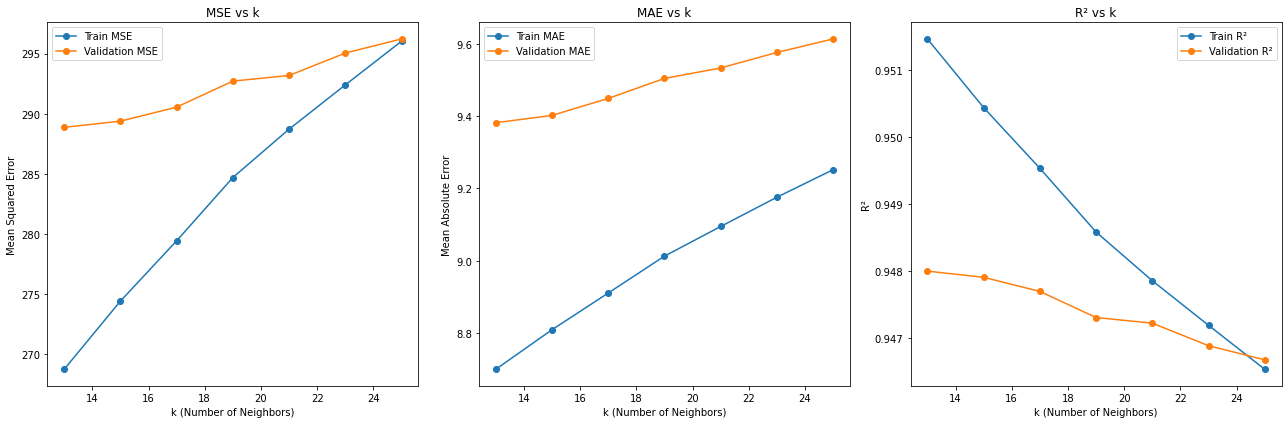

In [120]:
run_experiments(k_values = range(13,27,2), metric = 'minkowski', weights = 'uniform')

We experimented with cosine distance too. However, it was not viable due to how computationally expensive it was

**Best hyperparameters**

Based on our experiments we found out that the best hyperparameters were non-weighted voting(uniform), since avoids the overfitting problem in the training and validation sets. For the distance measurement, we tested that manhattan distance was slightly more effective, than others like euclidean. For our K chosen, we have selected K=21, since is the point previous to the overlap of our MSE, and it reduced the overfitting, without increasing considerably our errors

**Testing the KNN model**

In [121]:
run_knn(X_train, y_train, k=21,metric = 'manhattan', weights = 'uniform', data_type = 'Testing')

(287.69543543515533, 8.899011004069234, 0.948045263935726)

In [122]:
run_knn(X_val, y_val, k=21,metric = 'manhattan', weights = 'uniform', data_type = 'Testing')

(291.13083892347925, 9.298975814618766, 0.9475970164053455)

In [116]:
run_knn(X_test, y_test, k=21,metric = 'manhattan', weights = 'uniform', data_type = 'Testing')

(314.83925236959243, 9.359664465089937, 0.942883629321621)

## K-Nearest Neighbors (KNN) Model Development

### 1. **Tools and Libraries**
- **Scikit-learn** for KNN implementation.
- **Pandas** for data handling, **NumPy** for numerical operations.

### 2. **Model Building**
- Used **KNeighborsRegressor** for regression.
- Tuned hyperparameters: `n_neighbors`, `metric`, and `weights`.
- **Standardized data** with **StandardScaler**.
- Split data into train-validation-test sets 
- Evaluated with **MAE**, **MSE**, and **R²**.

### 3. **Visualization**
- Plotted error distributions and evaluated feature importance using matplotlib

## KNN Model Evaluation

### 1. **KNN Evaluation**
- The model showed good performance with a relatively **low MAE**, around 8.9 in the training set and around 9.3 in the test and validation sets. This tells us that the prediction on average was around 9 dollars of the actual value of the fare. This value could be higher, but is a really solid score. 
- The **MSE** penalises a lot more the predictionsthat are far off the actual value, our error for this measurement in the training and validation was around 290, whereas in the test was closer to 315. This relatively high score can be caused because of some outliers that we did not remove during our preprocesssing. We tried to use as much data as we could, so we did not want to delete valuable points. 
- However, we recorded a really **high R²** around 0.94 in all sets, meaning 94% of the variance in the target variable is explained by the KNN model. This suggests that the KNN model captures the underlying relationships in the data very well.

### 2. **Limitations**
- **KNN**: Struggles with high-dimensional data due to it can not determine what attributes are most important
- It is considered a "lazy learner" since the model itself does not actually learn. It may be complicated to learn more complicated patterns
- May perform poorly if the dataset contains many irrelevant features.
- Computationally expensive for large datasets since it requires calculating distances for each prediction.
- If your dataset is imbalanced, KNN may struggle to make accurate predictions for the underrepresented ranges.
- It can be sensitive to outliers and noisy data, as they can disproportionately affect distance calculations.


## Unsupervised Learning


After the supervised learning methods, we are going to try to find patterns in our dataset. We are running K-Means to find some features, or groups that could be used as filters for a website, for example.

## Kmeans Clustering

First of all we are going to use the whole dataset, since we dont have target variables. We use again Z-score standdaritation to put all columns to scale

In [31]:
columns_to_scale = ['nsmiles', 'passengers' ,'fare', 'large_ms' , 'fare_lg','lf_ms','fare_low']
scaler_kmeans= StandardScaler()

scaled_columns = scaler_kmeans.fit_transform(df_no_outliers[columns_to_scale])

df_kmeans = df_no_outliers.copy()  
df_kmeans[columns_to_scale] = scaled_columns

Scaled data

In [32]:
df_kmeans.head(10)

,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,Quarter_1,Quarter_2,Quarter_3,Quarter_4,Year_Category_1990s,Year_Category_2000s,Year_Category_2010s,Year_Category_2020s
63380,0.040429,-0.589577,-2.229377,1.487632,-2.101539,1.646442,-2.027862,0,1,0,0,1,0,0,0
43996,-0.851307,-0.589577,-2.224001,1.487632,-2.096474,1.646442,-2.022001,1,0,0,0,1,0,0,0
69423,-0.909712,-0.581811,-2.223866,1.487632,-2.096348,1.646442,-2.021854,0,1,0,0,1,0,0,0
43897,-1.339910,-0.589577,-2.222657,1.487632,-2.095208,1.646442,-2.020535,0,0,0,1,1,0,0,0
65517,0.081740,-0.577928,-2.219700,1.487632,-2.092423,1.646442,-2.017312,1,0,0,0,1,0,0,0
49388,-1.040765,-0.589577,-2.218625,1.487632,-2.091410,1.646442,-2.016140,0,0,0,1,0,1,0,0
54549,-1.178942,-0.589577,-2.218625,1.487632,-2.091410,1.646442,-2.016140,0,1,0,0,1,0,0,0
69433,-0.909712,-0.585694,-2.216475,1.487632,-2.089384,1.646442,-2.013795,0,1,0,0,1,0,0,0
219871,-1.419682,-0.331357,-2.216206,1.487632,-2.089131,1.646442,-2.013502,0,0,1,0,1,0,0,0
219837,-1.419682,-0.280878,-2.216206,1.487632,-2.089131,1.646442,-2.013502,0,0,0,1,1,0,0,0


Now we can use the elbow method to determine the most suitable value of K for our dataset. As we can see by the graph of the WSS and the BSS the most suitable would be around 3,4,5; but in this scenario there is not really a clear drop like in other cases

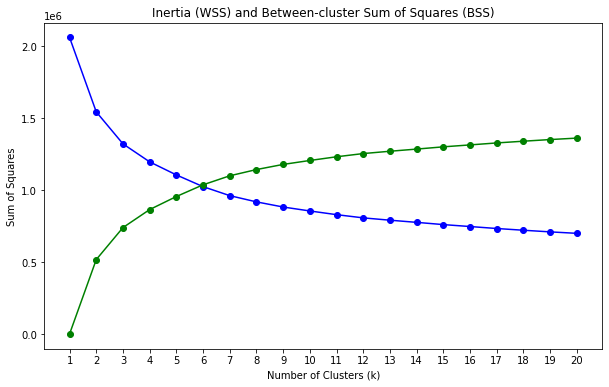

In [89]:
inertia_values = []
bss_values = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans)
    
    # Store inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    # Compute Between-cluster Sum of Squares (BSS)
    # BSS = Total Sum of Squares (TSS) - Inertia (WSS)
    # TSS = sum of squared distances from each point to the overall mean
    total_ss = np.sum((df_kmeans - np.mean(df_kmeans, axis=0))**2).sum()
    bss = total_ss - kmeans.inertia_
    bss_values.append(bss)


# Plot Inertia (WSS) and Between-cluster Sum of Squares (BSS)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia_values, marker='o', label='Inertia (WSS)', color='blue')
plt.plot(range(1, 21), bss_values, marker='o', label='Between-cluster SS (BSS)', color='green')

plt.title('Inertia (WSS) and Between-cluster Sum of Squares (BSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares')
# plt.legend()
plt.xticks(range(1, 21))
plt.show()


We are not able to find the silhoutte score for the whole dataset since it takes really long time, so we decided to use a smaller portion of the data

In [41]:
X_subset = shuffle(df_kmeans, random_state=42)[:int(len(df_kmeans) * 0.01)]

We defined a function to run the silhouette score,and graph it for k=2 to 21

In [43]:
def run_silhouette_score(data, random_state = 42, init ='k-means++', n_init = 10):
    # Assuming X_subset is your data
    k_range = range(2, 21)  # Define range for K (from 2 to 20)
    silhouette_scores = []

    # Loop over different values of K
    for k in k_range:
        kmeans = KMeans(n_clusters=k,init = init, random_state=random_state, n_init =n_init )
        kmeans.fit(data)

        # Calculate silhouette score for each K
        score = silhouette_score(X_subset, kmeans.labels_)
        silhouette_scores.append(score)

    # Plot silhouette scores for each K
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different K Values')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.show()


We can see a graph of the silhoutte score acrross number of clusters. Based on the WCSS graph from earlier too, we can consider that k=4 is the most optimal K

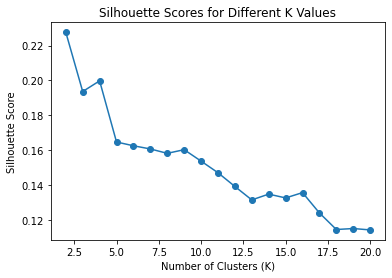

In [92]:
run_silhouette_score(data=X_subset, random_state = 42)

Lets try starting with random initial clusterds instead of the optimized provided by the model. It is giving us really similar results, in the earlies k of the model

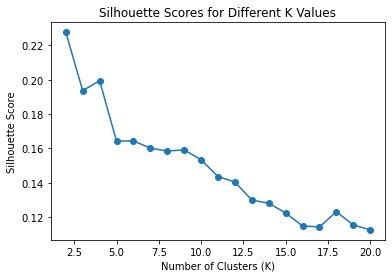

In [93]:
run_silhouette_score(data= X_subset, random_state = 42, init = 'random')

We can implement more randomness in the model, but the performance keeps very similar

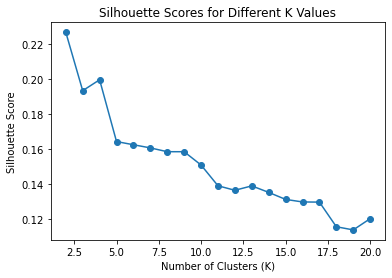

In [94]:
run_silhouette_score(data= X_subset, random_state = 100)

We can increase the number of initializations of the model, but it doesnt show a better silhouette score

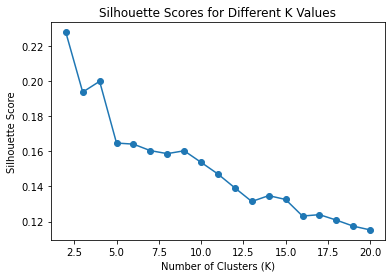

In [95]:
run_silhouette_score(data= X_subset, random_state = 42, n_init = 25)

Since we have not found really improvement in our experiments, we are going to move along and try to identify patterns in our clusters

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_kmeans)

KMeans(n_clusters=4, random_state=42)

Lets compare three of the most important features, the passengers, miles of the flights and fare of our 4 centroids

In [34]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.33914207,  2.9744533 , -0.62194674, -0.37679181, -0.48809987,
        -0.40677945, -0.71040585,  0.23188595,  0.27157991,  0.24522626,
         0.25130787,  0.15158253,  0.34109338,  0.37143604,  0.13588805],
       [-0.60409666, -0.20695505, -0.61968885,  1.08600195, -0.62849602,
         1.37505164, -0.3237926 ,  0.25593013,  0.25237371,  0.24923082,
         0.24246535,  0.22026665,  0.3079697 ,  0.33878652,  0.13297714],
       [ 0.93679106, -0.25403649,  1.18439849, -0.40904929,  1.15074049,
        -0.27579541,  1.08494651,  0.2602562 ,  0.25835459,  0.24536757,
         0.23602164,  0.20123237,  0.23305866,  0.44514056,  0.12056842],
       [-0.21914536, -0.15792648, -0.33482047, -0.32248036, -0.32710624,
        -0.58388698, -0.43303033,  0.25800367,  0.24373702,  0.24890392,
         0.24935539,  0.25589678,  0.4272772 ,  0.23737622,  0.0794498 ]])

But this doesnt mean much to us, lets de-scaled to put them back in the initial form

In [35]:
rescaled_centroids = scaler_kmeans.inverse_transform(centroids[:, :7])
rescaled_centroids

array([[9.50540413e+02, 1.83570625e+03, 1.69604618e+02, 5.81162948e-01,
        1.77428606e+02, 3.16488707e-01, 1.39910356e+02],
       [7.64541999e+02, 1.97075115e+02, 1.69772622e+02, 9.09775059e-01,
        1.66340189e+02, 9.09654830e-01, 1.66294943e+02],
       [1.84624687e+03, 1.72825125e+02, 3.04009997e+02, 5.73916404e-01,
        3.06863397e+02, 3.60092893e-01, 2.62434945e+02],
       [1.03477823e+03, 2.22328003e+02, 1.90968926e+02, 5.93363849e-01,
        1.90143803e+02, 2.57530150e-01, 1.58839967e+02]])

We define a function to plot the centroids in 3D

In [36]:
def plot_centroids(rescaled_centroids):
    miles = rescaled_centroids[:, 0]  # First attribute
    passengers = rescaled_centroids[:, 1]  # Second attribute
    fare = rescaled_centroids[:, 2]  # Third attribute

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(miles, passengers, fare, c='blue', s=100, label='Centroids')
    ax.set_title('3D Scatter Plot of Cluster Centroids')
    ax.set_xlabel('Miles')
    ax.set_ylabel('Passengers')
    ax.set_zlabel('Fare')
    ax.view_init(elev=30, azim=45)
    ax.grid(True)

    plt.legend()
    plt.show()

We can appreciate three clear groups in our plot, longer and more expensive floghts, against shorter, less full flights and then then shorter and full flights

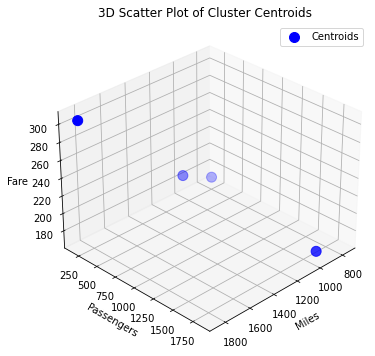

In [37]:
plot_centroids(rescaled_centroids)

If we reduced the number of clusters equal to three this is more clear. As stated, before we can see three clear differenced clusters, based on fare, miles and passengers

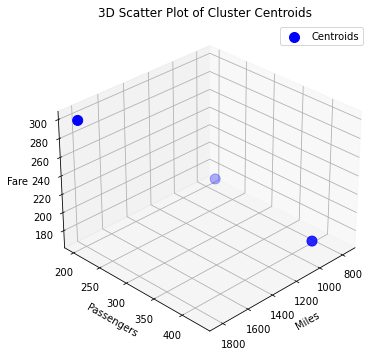

In [38]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_kmeans)
centroids_3 = kmeans.cluster_centers_
rescaled_centroids_3 = scaler_kmeans.inverse_transform(centroids_3[:,:7])
plot_centroids(rescaled_centroids_3)

Higher cluster values dont give us a lot more information, since some centroids are overlapping, between each other

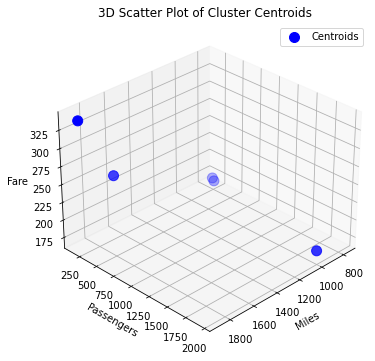

In [39]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_kmeans)
centroids_5 = kmeans.cluster_centers_
rescaled_centroids_5 = scaler_kmeans.inverse_transform(centroids_5[:,:7])
plot_centroids(rescaled_centroids_5)

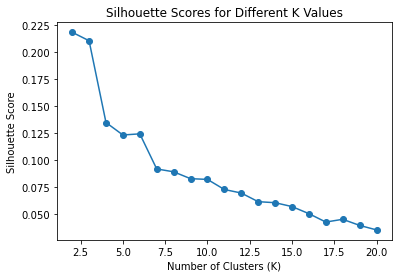

In [44]:
selected_data = X_subset
selected_columsn = X_subset[['fare', 'nsmiles', 'passengers']]
run_silhouette_score(data= selected_columsn, random_state = 42, n_init = 25)

## K-Means Clustering Model Development

1. **Tools and Libraries**'

   - **Scikit-learn** for KMeans implementation.
   - **Pandas** for data handling, **NumPy** for numerical operations.
   - **Matplotlib** for visualization.

2. **Model Building**

   - Used **KMeans** for clustering.
   - Tuned hyperparameters: `n_clusters`, `init`, and `randomness`.
   - Standardized data with **StandardScaler**.
   - Applied **Elbow Method** to determine the optimal number of clusters.
   - Applied clustering to segment data into groups based on features.
  
3. **Visualization**

   - Plotted clusters in a 2D/3D space to illustrate how the model separates the data.
   - Visualized cluster centroids and distribution using **matplotlib** and **seaborn**.


## KMeans Model Evaluation

### 1. **Performance Metrics**
- **Inertia (Within-cluster Sum of Squares)**: Measures the compactness of the clusters. Lower values indicate better clustering.
- **Between-cluster Sum of Squares (BSS)**: Measures the separation between clusters. Higher values suggest better-defined clusters.
- **Silhouette Score**: Assesses how well the data points fit their clusters. A higher value indicates better-defined clusters.

### 2. **KMeans Evaluation**

- **Inertia** decreased as the number of clusters increased, suggesting better clustering with more clusters. The most optimal values found using the elbow method landed between k=3 to k=5.
- **BSS** increased, indicating that clusters became more distinct as `k` grew.
- **Silhouette Score**: The highest silhouette score found was around `0.2` when `k=4`, for the whole dataset. This score is relatively low (range: -1 to 1). However, by plotting the data with 3 important features (`passenger`, `distance`, and `fare`) in 3D, we observed 3 distinct clusters. With `k=4`, one cluster was very similar to another. Running KMeans on just the selected features with `k=2` or `k=3` provided better results, with a silhouette score of `0.21`. The score was slightly better for k=2, but I think the visualization was clearer for 3. It is likely that some of the categorical features decreased the silhouette score for `k=3`. Graphically, the centroids of our 3 clusters showed different behaviors.


### 3. **Limitations**
- Hard to interpret results combining categorical and numerical features
- **Scalability**: Computationally expensive for large datasets as it requires calculating distances for each point to each centroid.
- **Interpretability**: As the number of clusters increases, interpreting the results becomes harder, especially if clusters are not easily distinguishable.

### 4. **Next Steps**
- Investigate alternative clustering algorithms (e.g., DBSCAN or Hierarchical Clustering) to see if they perform better on this data.
- Explore feature scaling and feature selection techniques to see if they can improve clustering results, especially with categorical features.


# Conclustion

Although all these models obtained good results. The KNN model obtainted the best results with the lowest absolute mean error compared to the ANN model.Therefore, our original hypothesis was innaccurate for the supervised learning. We believe this could be due to the specific dataset we are using, a simplistic, "lazy learner" approach is the better option. However, for being our first project trying to solve a regression problem, it was a promising result, being off from the actual by 9-11 dollars on average, it is really good for prices that range between 50-1000.

For the unsupervised learning approach, we tried clustering with K means. In our hypothesis we expected to get 4 really clear clusters. In reality we found out that finding clear clusters was a complicated task. The highest silhouette score found was around 0.21, which is pretty low for a clustering task. However, from data visualization we have found that we have 2/3 clear clusters based on the centroids. The model did not probably give us a great score, because of some outliers in our data. We took a conservative approach, instead of removing all of them. We believe with some more time, we could find the underlying patterns of the dataset, and have better clustering with maybe other models

## Contributions

We both work together in this project, setting up a github repo. The data preprocessing part was done by both of us, taking some different ways in the standarization or outlier removal. Tanner took care of the ANN for supervised learning, and I did the KNN and Kmeans model development. Both of us worked on the style and cleaning of the reports